In [34]:
# ----------------- 1. IMPORT LIBRARIES -----------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import IFrame, display
import uuid
import altair as alt

# Seaborn style
sns.set(style="darkgrid")

In [35]:
df = pd.read_csv("healthcare_dataset.csv", nrows=1000, parse_dates=["Date of Admission", "Discharge Date"])
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
df["Billing Amount"] = pd.to_numeric(df["Billing Amount"], errors="coerce")
df.dropna(subset=["Age", "Billing Amount", "Gender", "Admission Type"], inplace=True)

<>:14: SyntaxWarning:

invalid escape sequence '\d'

<>:14: SyntaxWarning:

invalid escape sequence '\d'

/var/folders/v3/3y130rn94xnd3180_kh83jj00000gn/T/ipykernel_63899/2385981701.py:14: SyntaxWarning:

invalid escape sequence '\d'



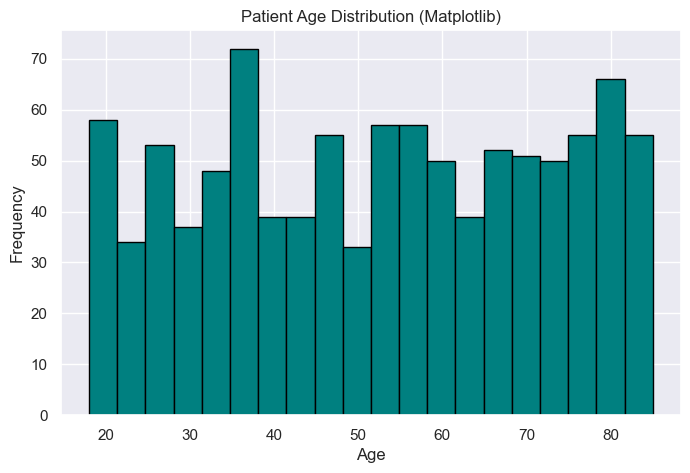

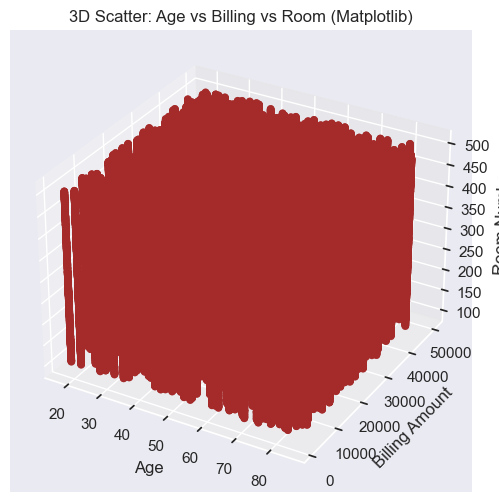

In [39]:
# ----------------- 3. MATPLOTLIB 2D & 3D -----------------
# 2D Histogram
plt.figure(figsize=(8, 5))
plt.hist(df["Age"], bins=20, color="teal", edgecolor="black")
plt.title("Patient Age Distribution (Matplotlib)")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# 3D Scatter (Matplotlib)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Age"], df["Billing Amount"], df["Room Number"].astype(str).str.extract('(\d+)').astype(float), c='brown')
ax.set_xlabel("Age")
ax.set_ylabel("Billing Amount")
ax.set_zlabel("Room Number")
plt.title("3D Scatter: Age vs Billing vs Room (Matplotlib)")
plt.show()

/var/folders/v3/3y130rn94xnd3180_kh83jj00000gn/T/ipykernel_63899/1841871717.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




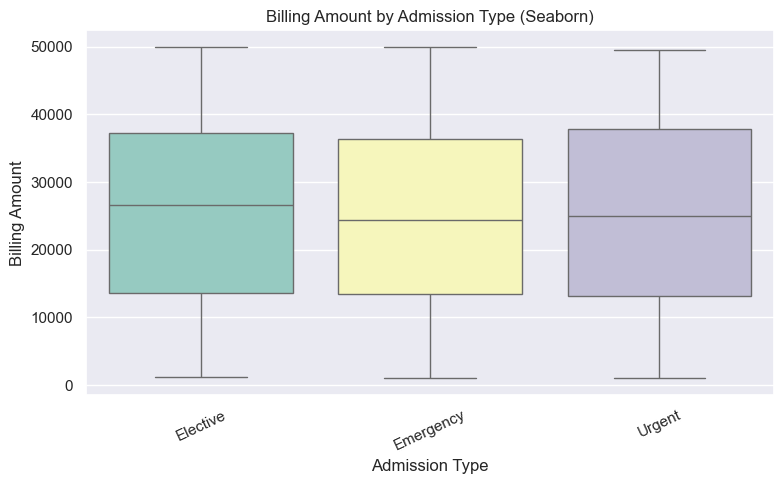

In [ ]:
# ----------------- 4. SEABORN -----------------
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Admission Type", y="Billing Amount", palette="Set3")
plt.xticks(rotation=25)
plt.title("Billing Amount by Admission Type (Seaborn)")
plt.tight_layout()
plt.show()

In [41]:
# ----------------- 5. PLOTLY (2D + 3D) -----------------
fig1 = px.scatter(
    df, x="Age", y="Billing Amount", color="Gender",
    hover_data=["Name", "Doctor", "Medical Condition"],
    title="Plotly Interactive: Age vs Billing"
)
html1 = f"plotly2d_{uuid.uuid4().hex}.html"
fig1.write_html(html1)
display(IFrame(html1, width="100%", height=600))

fig2 = px.scatter_3d(
    df, x="Age", y="Billing Amount", z="Room Number",
    color="Gender", hover_name="Name",
    title="Plotly 3D Scatter: Age vs Billing vs Room"
)
html2 = f"plotly3d_{uuid.uuid4().hex}.html"
fig2.write_html(html2)
display(IFrame(html2, width="100%", height=600))


In [43]:
# ----------------- 7. ALTAIR -----------------
alt_chart = alt.Chart(df).mark_circle(size=60).encode(
    x="Age",
    y="Billing Amount",
    color="Gender",
    tooltip=["Name", "Medical Condition", "Doctor"]
).properties(
    title="Altair: Age vs Billing Amount"
).interactive()

alt_chart.display()


alt.Chart(...)